In [ ]:
import numpy as np
import os
%cd ..

# RMSEs:

In [2]:
def rmse_metric(x,y):
    # return np.sqrt(np.mean((x-y)**2))
    return np.sqrt(np.mean(np.square(x - y), axis=1)).mean()
def rmse_metric_each(x,y):
    return np.sqrt(np.mean((x-y)**2,axis=1))    

In [3]:
models = [m for m in os.listdir('base_forecasters/7') if m!='_all_npy'] 

In [4]:
for FH in [7,4,1]:
    if FH==7:
        idx = np.load("results_final/epochs_5_WD_0.009_lr_0.03-7/random_idx_test_FH_7.npy")
        metats = np.genfromtxt('results_final/epochs_5_WD_0.009_lr_0.03-7/FH_7_test.csv',delimiter=',')
        idx_xgb = np.load("results_final/epochs_5_WD_0.005_lr_0.05-xgb/random_idx_test_FH_7.npy")
        metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.005_lr_0.05-xgb/FH_7_test.csv',delimiter=',')
        m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',')[-36194:,:]
        fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',')[-36194:,:]
        fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',')[-36194:,:]
    elif FH==4:
        idx = np.load("results_final/epochs_5_WD_0.001_lr_0.06-4/random_idx_test_FH_4.npy")
        metats = np.genfromtxt('results_final\epochs_5_WD_0.001_lr_0.06-4\FH_4_test.csv',delimiter=',')
        idx_xgb = np.load("results_final/epochs_5_WD_0.005_lr_0.05-xgb/random_idx_test_FH_4.npy")
        metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.005_lr_0.05-xgb/FH_4_test.csv',delimiter=',')
        m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',')[-36194:,:]
        fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',')[-36194:,:]
        fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',')[-36194:,:]
        
    elif FH==1:
        idx = np.load("results_final/epochs_5_WD_0.001_lr_0.02-1/random_idx_test_FH_1.npy")
        metats = np.genfromtxt('results_final/epochs_5_WD_0.001_lr_0.02-1/FH_1_test.csv',delimiter=',').reshape(-1,1)
        idx_xgb = np.load("results_final/epochs_5_WD_0.001_lr_0.01-xgb1/random_idx_test_FH_1.npy")
        metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.001_lr_0.01-xgb1/FH_1_test.csv',delimiter=',').reshape(-1,1)
        m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:]
        fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:]
        fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:]        
    pre_path = f"base_forecasters/{FH}/_all_npy/base_test.npy"
    pre = np.load(pre_path)
    true_path = "src/dataset/_true_npy/x_true_test.npy"
    true = np.load(true_path)
    print(f"\nRMSEs {FH} steps:")
    model="MetaTs_RF"
    rmse_metats = rmse_metric(true[idx,-FH:],metats)
    print(f"{model:15.20s} : {np.round_(rmse_metats,3)}")
    model="MetaTs_XGB"
    rmse_metats = rmse_metric(true[idx_xgb,-FH:],metats_xgb)
    print(f"{model:15.20s} : {np.round_(rmse_metats,3)}")
    model="M0"
    rmse = rmse_metric(true[:,-FH:],m0)
    print(f"{model:15.20s} : {np.round_(rmse,3)}")
    model="FFORMA1"
    rmse = rmse_metric(true[:,-FH:],fforma1)
    print(f"{model:15.20s} : {np.round_(rmse,3)}") 
    model="FFORMA2"
    rmse = rmse_metric(true[:,-FH:],fforma2)
    print(f"{model:15.20s} : {np.round_(rmse,3)}")   
    model="EW"
    equally_weighted=np.mean(pre,axis=1)
    rmse = rmse_metric(true[:,-FH:],equally_weighted)
    print(f"{model:15.20s} : {np.round_(rmse,3)}")
    for model, i in zip(models, range(pre.shape[1])):
        rmse = rmse_metric(true[:,-FH:],pre[:,i,:])
        print(f"{model:15.20s} : {np.round_(rmse,3)}")


RMSEs 7 steps:
MetaTs_RF       : 8.507
MetaTs_XGB      : 8.336
M0              : 8.864
FFORMA1         : 9.259
FFORMA2         : 9.231
EW              : 8.526
ADL_1           : 8.762
arimaX_1        : 9.135
ELM_1           : 10.039
ELM_pool_Dir_7  : 9.343
ETS             : 11.458
L_ADLP          : 9.424
SVM_1           : 9.281
Xgboost_7       : 8.864

RMSEs 4 steps:
MetaTs_RF       : 7.608
MetaTs_XGB      : 8.205
M0              : 8.02
FFORMA1         : 8.506
FFORMA2         : 8.537
EW              : 7.724
ADL_1           : 7.998
arimaX_1        : 8.257
ELM_1           : 9.137
ELM_pool_Dir_7  : 8.432
ETS             : 10.427
L_ADLP          : 8.515
SVM_1           : 8.307
Xgboost_7       : 8.02

RMSEs 1 steps:
MetaTs_RF       : 5.943
MetaTs_XGB      : 6.144
M0              : 6.035
FFORMA1         : 6.625
FFORMA2         : 6.598
EW              : 6.103
ADL_1           : 6.195
arimaX_1        : 7.468
ELM_1           : 6.868
ELM_pool_Dir_7  : 6.58
ETS             : 7.425
L_ADLP          

# AvgRelRMSE

In [5]:
def AvgRleRMSE(rmsem,rmsead,idx=None,model=None):
    if model=="metats":
        tagh = ((rmsem+1e-5)/(rmsead[idx]+1e-5))
    else:    
        tagh = ((rmsem+1e-5)/(rmsead+1e-5))  
    return np.exp(np.mean(np.log(tagh)))  

In [6]:
for FH in [7,4,1]:
    if FH==7:
        idx = np.load("results_final/epochs_5_WD_0.009_lr_0.03-7/random_idx_test_FH_7.npy")
        metats = np.genfromtxt('results_final/epochs_5_WD_0.009_lr_0.03-7/FH_7_test.csv',delimiter=',')
        idx_xgb = np.load("results_final/epochs_5_WD_0.005_lr_0.05-xgb/random_idx_test_FH_7.npy")
        metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.005_lr_0.05-xgb/FH_7_test.csv',delimiter=',')
        m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',')[-36194:,:]
        fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',')[-36194:,:]
        fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',')[-36194:,:]
    elif FH==4:
        idx = np.load("results_final/epochs_5_WD_0.001_lr_0.06-4/random_idx_test_FH_4.npy")
        metats = np.genfromtxt('results_final\epochs_5_WD_0.001_lr_0.06-4\FH_4_test.csv',delimiter=',')
        idx_xgb = np.load("results_final/epochs_5_WD_0.005_lr_0.05-xgb/random_idx_test_FH_4.npy")
        metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.005_lr_0.05-xgb/FH_4_test.csv',delimiter=',')
        m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',')[-36194:,:]
        fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',')[-36194:,:]
        fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',')[-36194:,:]
        
    elif FH==1:
        idx = np.load("results_final/epochs_5_WD_0.001_lr_0.02-1/random_idx_test_FH_1.npy")
        metats = np.genfromtxt('results_final/epochs_5_WD_0.001_lr_0.02-1/FH_1_test.csv',delimiter=',').reshape(-1,1)
        idx_xgb = np.load("results_final/epochs_5_WD_0.001_lr_0.01-xgb1/random_idx_test_FH_1.npy")
        metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.001_lr_0.01-xgb1/FH_1_test.csv',delimiter=',').reshape(-1,1)
        m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:]
        fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:]
        fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:]        
    pre_path = f"base_forecasters/{FH}/_all_npy/base_test.npy"
    pre = np.load(pre_path)
    true_path = "src/dataset/_true_npy/x_true_test.npy"
    true = np.load(true_path)
    print(f"\nAvgRelRMSEs {FH} steps:")
    rmse_adl = rmse_metric_each(true[:,-FH:],pre[:,0,:])
    model="MetaTs_RF"
    rmse_metats = rmse_metric_each(true[idx,-FH:],metats)
    avg_metats = AvgRleRMSE(rmse_metats,rmse_adl,idx,model="metats")
    print(f"{model:15.20s} : {np.round_(avg_metats,3)}")
    model="MetaTs_xgb"
    rmse_metats_xgb = rmse_metric_each(true[idx_xgb,-FH:],metats_xgb)
    avg_metats_xgb = AvgRleRMSE(rmse_metats_xgb,rmse_adl,idx_xgb,model="metats")
    print(f"{model:15.20s} : {np.round_(avg_metats_xgb,3)}")
    model="M0"
    rmse_m0 = rmse_metric_each(true[:,-FH:],m0)
    avg_m0 = AvgRleRMSE(rmse_m0,rmse_adl)
    print(f"{model:15.20s} : {np.round_(avg_m0,3)}")
    model="FFORMA1"
    rmse_fforma1 = rmse_metric_each(true[:,-FH:],fforma1)
    avg_fforma1 = AvgRleRMSE(rmse_fforma1,rmse_adl)
    print(f"{model:15.20s} : {np.round_(avg_fforma1,3)}")  
    model="FFORMA2"
    rmse_fforma2 = rmse_metric_each(true[:,-FH:],fforma2)
    avg_fforma2 = AvgRleRMSE(rmse_fforma2,rmse_adl)
    print(f"{model:15.20s} : {np.round_(avg_fforma2,3)}")      
    model="EW"
    equally_weighted=np.mean(pre,axis=1)
    rmse_ew = rmse_metric_each(true[:,-FH:],equally_weighted)
    avg_ew = AvgRleRMSE(rmse_ew,rmse_adl)
    print(f"{model:15.20s} : {np.round_(avg_ew,3)}")
    for model, i in zip(models, range(pre.shape[1])):
        rmse = rmse_metric_each(true[:,-FH:],pre[:,i,:])
        avg_m = AvgRleRMSE(rmse,rmse_adl)
        print(f"{model:15.20s} : {np.round_(avg_m,3)}")


AvgRelRMSEs 7 steps:
MetaTs_RF       : 0.969
MetaTs_xgb      : 0.969
M0              : 0.987
FFORMA1         : 1.028
FFORMA2         : 1.024
EW              : 0.969
ADL_1           : 1.0
arimaX_1        : 1.03
ELM_1           : 1.104
ELM_pool_Dir_7  : 1.011
ETS             : 1.147
L_ADLP          : 1.016
SVM_1           : 1.03
Xgboost_7       : 0.987

AvgRelRMSEs 4 steps:
MetaTs_RF       : 0.969
MetaTs_xgb      : 0.969
M0              : 0.979
FFORMA1         : 1.037
FFORMA2         : 1.036
EW              : 0.971
ADL_1           : 1.0
arimaX_1        : 1.029
ELM_1           : 1.106
ELM_pool_Dir_7  : 1.004
ETS             : 1.161
L_ADLP          : 1.01
SVM_1           : 1.03
Xgboost_7       : 0.979

AvgRelRMSEs 1 steps:
MetaTs_RF       : 0.984
MetaTs_xgb      : 0.995
M0              : 0.985
FFORMA1         : 1.04
FFORMA2         : 1.04
EW              : 0.992
ADL_1           : 1.0
arimaX_1        : 1.113
ELM_1           : 1.074
ELM_pool_Dir_7  : 1.014
ETS             : 1.112
L_ADLP    

# AvgRelMAE

In [9]:
def mae(x,y):
    return np.mean(np.abs(x - y), axis=1)
    
def AvgRleMAE(rmsem,rmsead,idx=None,model=None):
    if model=="metats":
        tagh = ((rmsem+1e-5)/(rmsead[idx]+1e-5))
    else:    
        tagh = ((rmsem+1e-5)/(rmsead+1e-5))  
    return np.exp(np.mean(np.log(tagh)))  

In [10]:
for FH in [7,4,1]:
    if FH==7:
        idx = np.load("results_final/epochs_5_WD_0.009_lr_0.03-7/random_idx_test_FH_7.npy")
        metats = np.genfromtxt('results_final/epochs_5_WD_0.009_lr_0.03-7/FH_7_test.csv',delimiter=',')
        idx_xgb = np.load("results_final/epochs_5_WD_0.005_lr_0.05-xgb/random_idx_test_FH_7.npy")
        metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.005_lr_0.05-xgb/FH_7_test.csv',delimiter=',')
        m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',')[-36194:,:]
        fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',')[-36194:,:]
        fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',')[-36194:,:]
    elif FH==4:
        idx = np.load("results_final/epochs_5_WD_0.001_lr_0.06-4/random_idx_test_FH_4.npy")
        metats = np.genfromtxt('results_final\epochs_5_WD_0.001_lr_0.06-4\FH_4_test.csv',delimiter=',')
        idx_xgb = np.load("results_final/epochs_5_WD_0.005_lr_0.05-xgb/random_idx_test_FH_4.npy")
        metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.005_lr_0.05-xgb/FH_4_test.csv',delimiter=',')
        m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',')[-36194:,:]
        fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',')[-36194:,:]
        fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',')[-36194:,:]
        
    elif FH==1:
        idx = np.load("results_final/epochs_5_WD_0.001_lr_0.02-1/random_idx_test_FH_1.npy")
        metats = np.genfromtxt('results_final/epochs_5_WD_0.001_lr_0.02-1/FH_1_test.csv',delimiter=',').reshape(-1,1)
        idx_xgb = np.load("results_final/epochs_5_WD_0.001_lr_0.01-xgb1/random_idx_test_FH_1.npy")
        metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.001_lr_0.01-xgb1/FH_1_test.csv',delimiter=',').reshape(-1,1)
        m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:]
        fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:]
        fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:]        
    pre_path = f"base_forecasters/{FH}/_all_npy/base_test.npy"
    pre = np.load(pre_path)
    true_path = "src/dataset/_true_npy/x_true_test.npy"
    true = np.load(true_path)
    print(f"\nAvgRleMAE {FH} steps:")
    rmse_adl = mae(true[:,-FH:],pre[:,0,:])
    model="MetaTs_RF"
    rmse_metats = mae(true[idx,-FH:],metats)
    avg_metats = AvgRleMAE(rmse_metats,rmse_adl,idx,model="metats")
    print(f"{model:15.20s} : {np.round_(avg_metats,3)}")
    model="MetaTs_xgb"
    rmse_metats_xgb = mae(true[idx_xgb,-FH:],metats_xgb)
    avg_metats_xgb = AvgRleMAE(rmse_metats_xgb,rmse_adl,idx_xgb,model="metats")
    print(f"{model:15.20s} : {np.round_(avg_metats_xgb,3)}")
    model="M0"
    rmse_m0 = mae(true[:,-FH:],m0)
    avg_m0 = AvgRleMAE(rmse_m0,rmse_adl)
    print(f"{model:15.20s} : {np.round_(avg_m0,3)}")
    model="FFORMA1"
    rmse_fforma1 = mae(true[:,-FH:],fforma1)
    avg_fforma1 = AvgRleMAE(rmse_fforma1,rmse_adl)
    print(f"{model:15.20s} : {np.round_(avg_fforma1,3)}")  
    model="FFORMA2"
    rmse_fforma2 = mae(true[:,-FH:],fforma2)
    avg_fforma2 = AvgRleMAE(rmse_fforma2,rmse_adl)
    print(f"{model:15.20s} : {np.round_(avg_fforma2,3)}")      
    model="EW"
    equally_weighted=np.mean(pre,axis=1)
    rmse_ew = mae(true[:,-FH:],equally_weighted)
    avg_ew = AvgRleMAE(rmse_ew,rmse_adl)
    print(f"{model:15.20s} : {np.round_(avg_ew,3)}")
    for model, i in zip(models, range(pre.shape[1])):
        rmse = mae(true[:,-FH:],pre[:,i,:])
        avg_m = AvgRleMAE(rmse,rmse_adl)
        print(f"{model:15.20s} : {np.round_(avg_m,3)}")


AvgRleMAE 7 steps:
MetaTs_RF       : 0.971
MetaTs_xgb      : 0.969
M0              : 0.984
FFORMA1         : 1.027
FFORMA2         : 1.024
EW              : 0.97
ADL_1           : 1.0
arimaX_1        : 1.029
ELM_1           : 1.103
ELM_pool_Dir_7  : 1.008
ETS             : 1.143
L_ADLP          : 1.013
SVM_1           : 1.031
Xgboost_7       : 0.984

AvgRleMAE 4 steps:
MetaTs_RF       : 0.968
MetaTs_xgb      : 0.969
M0              : 0.976
FFORMA1         : 1.037
FFORMA2         : 1.036
EW              : 0.971
ADL_1           : 1.0
arimaX_1        : 1.027
ELM_1           : 1.104
ELM_pool_Dir_7  : 1.001
ETS             : 1.165
L_ADLP          : 1.009
SVM_1           : 1.031
Xgboost_7       : 0.976

AvgRleMAE 1 steps:
MetaTs_RF       : 0.984
MetaTs_xgb      : 0.995
M0              : 0.985
FFORMA1         : 1.04
FFORMA2         : 1.04
EW              : 0.992
ADL_1           : 1.0
arimaX_1        : 1.113
ELM_1           : 1.074
ELM_pool_Dir_7  : 1.014
ETS             : 1.112
L_ADLP       

# Category analysis:

## Category RMSEs

In [ ]:
from src.dataset.data import Dataset
mode = "test"
data = Dataset(mode)
catg = data.catg
cat_lst = np.unique(catg)

In [12]:
for FH in [1,4,7]:
    if FH==7:
        idx = np.load("results_final/epochs_5_WD_0.009_lr_0.03-7/random_idx_test_FH_7.npy")
        metats = np.genfromtxt('results_final/epochs_5_WD_0.009_lr_0.03-7/FH_7_test.csv',delimiter=',')
        idx_xgb = np.load("results_final/epochs_5_WD_0.005_lr_0.05-xgb/random_idx_test_FH_7.npy")
        metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.005_lr_0.05-xgb/FH_7_test.csv',delimiter=',')
        m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',')[-36194:,:]
        fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',')[-36194:,:]
        fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',')[-36194:,:]
    elif FH==4:
        idx = np.load("results_final/epochs_5_WD_0.001_lr_0.06-4/random_idx_test_FH_4.npy")
        metats = np.genfromtxt('results_final\epochs_5_WD_0.001_lr_0.06-4\FH_4_test.csv',delimiter=',')
        idx_xgb = np.load("results_final/epochs_5_WD_0.005_lr_0.05-xgb/random_idx_test_FH_4.npy")
        metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.005_lr_0.05-xgb/FH_4_test.csv',delimiter=',')
        m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',')[-36194:,:]
        fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',')[-36194:,:]
        fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',')[-36194:,:]
        
    elif FH==1:
        idx = np.load("results_final/epochs_5_WD_0.001_lr_0.02-1/random_idx_test_FH_1.npy")
        metats = np.genfromtxt('results_final/epochs_5_WD_0.001_lr_0.02-1/FH_1_test.csv',delimiter=',').reshape(-1,1)
        idx_xgb = np.load("results_final/epochs_5_WD_0.001_lr_0.01-xgb1/random_idx_test_FH_1.npy")
        metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.001_lr_0.01-xgb1/FH_1_test.csv',delimiter=',').reshape(-1,1)
        m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:]
        fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:]
        fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:] 
    
    print("\n#####")
    print(f"RMSEs {FH} steps:")
    print("#####")
    models = [m for m in os.listdir('base_forecasters/7') if m!='_all_npy'] 

    pre_path = f"base_forecasters/{FH}/_all_npy/base_test.npy"
    pre = np.load(pre_path)[:,:,:]
    true_path = "src/dataset/_true_npy/x_true_test.npy"
    true = np.load(true_path)[:,:]
    true_metats = np.load(true_path)[idx,:]
    true_metats_xgb = np.load(true_path)[idx_xgb,:]

    dd = {}
    for cat in cat_lst:
        print("\n#")
        print(cat)
        print("#")
        errors=[]
        model="metats_RF"
        idx_each_catg_metats = (catg[idx,:]==cat).flatten()
        rmse = rmse_metric(true_metats[idx_each_catg_metats,-FH:],metats[idx_each_catg_metats,:])
        print(f"{model:15.20s} : {np.round_(rmse,3)}")
        errors.append(rmse)
        model="metats_xgb"
        idx_each_catg_metats_xgb = (catg[idx_xgb,:]==cat).flatten()
        rmse = rmse_metric(true_metats_xgb[idx_each_catg_metats_xgb,-FH:],metats_xgb[idx_each_catg_metats_xgb,:])
        print(f"{model:15.20s} : {np.round_(rmse,3)}")
        errors.append(rmse)
        model="M0"
        idx_each_catg = (catg[:,:]==cat).flatten()
        rmse = rmse_metric(true[idx_each_catg,-FH:],m0[idx_each_catg,:])
        print(f"{model:15.20s} : {np.round_(rmse,3)}")
        errors.append(rmse)
        model="FFORMA1"
        rmse = rmse_metric(true[idx_each_catg,-FH:],fforma1[idx_each_catg,:])
        print(f"{model:15.20s} : {np.round_(rmse,3)}")
        errors.append(rmse)    
        model="FFORMA2"
        rmse = rmse_metric(true[idx_each_catg,-FH:],fforma2[idx_each_catg,:])
        print(f"{model:15.20s} : {np.round_(rmse,3)}")
        errors.append(rmse)
        model="EW"
        equally_weighted=np.mean(pre,axis=1)
        rmse = rmse_metric(true[idx_each_catg,-FH:],equally_weighted[idx_each_catg,:])
        print(f"{model:15.20s} : {np.round_(rmse,3)}")
        errors.append(rmse)
        for model, i in zip(models, range(pre.shape[1])):
            rmse = rmse_metric(true[idx_each_catg,-FH:],pre[idx_each_catg,i,:])
            print(f"{model:15.20s} : {np.round_(rmse,3)}")
            errors.append(rmse)
        dd[cat]=errors    
        


#####
RMSEs 1 steps:
#####

#
beer
#
metats_RF       : 3.784
metats_xgb      : 3.983
M0              : 3.931
FFORMA1         : 4.239
FFORMA2         : 4.197
EW              : 3.939
ADL_1           : 4.018
arimaX_1        : 4.552
ELM_1           : 4.262
ELM_pool_Dir_7  : 4.083
ETS             : 4.549
L_ADLP          : 4.137
SVM_1           : 4.112
Xgboost_7       : 3.968

#
coffee
#
metats_RF       : 3.901
metats_xgb      : 5.674
M0              : 3.924
FFORMA1         : 4.397
FFORMA2         : 4.291
EW              : 4.115
ADL_1           : 3.926
arimaX_1        : 5.262
ELM_1           : 4.8
ELM_pool_Dir_7  : 4.006
ETS             : 5.315
L_ADLP          : 4.051
SVM_1           : 4.315
Xgboost_7       : 3.857

#
laundet
#
metats_RF       : 3.259
metats_xgb      : 3.118
M0              : 4.537
FFORMA1         : 5.5
FFORMA2         : 5.339
EW              : 5.108
ADL_1           : 4.221
arimaX_1        : 6.353
ELM_1           : 5.767
ELM_pool_Dir_7  : 5.325
ETS             : 6.298
L_ADL

## Category pct

In [13]:
# final tabel of the papar
m0o = [4.889, 6.175, 5.566, 6.228, 7.866, 9.726]
mtso = [4.725, 5.090, 4.447, 6.668 ,7.530 ,9.504]
adlo=[4.953, 5.770, 5.301, 6.261, 7.693, 9.890]

for i,j in zip(adlo,mtso):
    print(np.round_(((i-j)/i)*100.0,3))

4.603
11.785
16.11
-6.501
2.119
3.903


In [14]:
import seaborn
import matplotlib.pyplot as plt
import pandas as pd
seaborn.set(font_scale=1.5, rc={'text.usetex' : True})
seaborn.set_theme(palette="rocket", style="whitegrid")

In [15]:
dataset = pd.DataFrame()
for cat in cat_lst:
    idx_each_catg_metats = (catg[idx,:]==cat).flatten()
    rmse_metats = rmse_metric_each(true_metats[idx_each_catg_metats,-FH:],metats[idx_each_catg_metats,:])
    # rmse_adl_1 = rmse_metric_each(true_metats[idx_each_catg_metats,-FH:],pre[idx,:][idx_each_catg_metats,0,:]) 
    # pct_each_cat = ((rmse_adl_1+1e-5)-rmse_metats)/(rmse_adl_1+1e-5)
    rmse_m0 = rmse_metric_each(true[idx,:][idx_each_catg_metats,-FH:],m0[idx,:][idx_each_catg_metats,:]) 
    pct_each_cat = (rmse_m0-rmse_metats)/rmse_m0
    dataset = pd.concat([dataset,pd.DataFrame({'percentage':pct_each_cat,'categories':cat})],axis=0)
dataset = dataset[dataset["percentage"]>-2]    

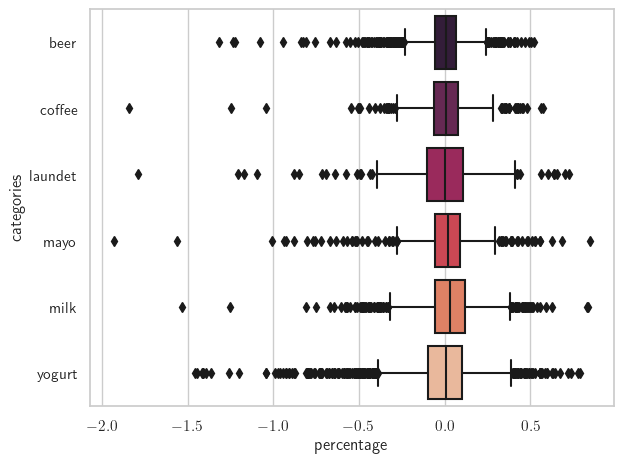

In [16]:
ff = seaborn.boxplot(x ='percentage', y ='categories', data = dataset);
plt.tight_layout()
# plt.savefig('results_final/boxplot_m0.pdf')

# Plot random time seris from IRI dataset

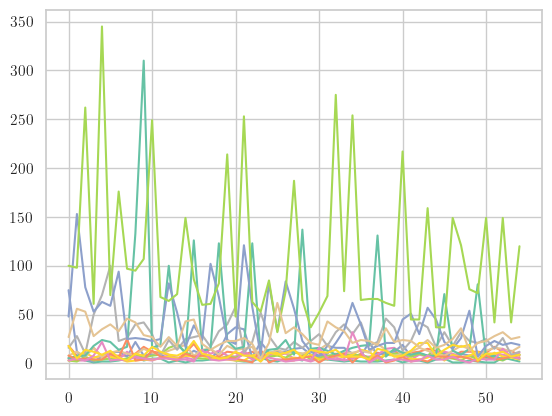

In [ ]:
seaborn.set_theme(palette="Set2", style="whitegrid")
rnd =np.random.randint(0,data.x.shape[0],15)
plt.plot(data.x[rnd,:,0].T);

# Best model for each category

In [18]:
FH=7
if FH==7:
    idx = np.load("results_final/epochs_5_WD_0.009_lr_0.03-7/random_idx_test_FH_7.npy")
    metats = np.genfromtxt('results_final/epochs_5_WD_0.009_lr_0.03-7/FH_7_test.csv',delimiter=',')
    idx_xgb = np.load("results_final/epochs_5_WD_0.005_lr_0.05-xgb/random_idx_test_FH_7.npy")
    metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.005_lr_0.05-xgb/FH_7_test.csv',delimiter=',')
    m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',')[-36194:,:]
    fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',')[-36194:,:]
    fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',')[-36194:,:]
elif FH==4:
    idx = np.load("results_final/epochs_5_WD_0.001_lr_0.06-4/random_idx_test_FH_4.npy")
    metats = np.genfromtxt('results_final\epochs_5_WD_0.001_lr_0.06-4\FH_4_test.csv',delimiter=',')
    idx_xgb = np.load("results_final/epochs_5_WD_0.005_lr_0.05-xgb/random_idx_test_FH_4.npy")
    metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.005_lr_0.05-xgb/FH_4_test.csv',delimiter=',')
    m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',')[-36194:,:]
    fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',')[-36194:,:]
    fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',')[-36194:,:]
    
elif FH==1:
    idx = np.load("results_final/epochs_5_WD_0.001_lr_0.02-1/random_idx_test_FH_1.npy")
    metats = np.genfromtxt('results_final/epochs_5_WD_0.001_lr_0.02-1/FH_1_test.csv',delimiter=',').reshape(-1,1)
    idx_xgb = np.load("results_final/epochs_5_WD_0.001_lr_0.01-xgb1/random_idx_test_FH_1.npy")
    metats_xgb = np.genfromtxt('results_final/epochs_5_WD_0.001_lr_0.01-xgb1/FH_1_test.csv',delimiter=',').reshape(-1,1)
    m0 = np.genfromtxt(f'M0\M0-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:]
    fforma1 = np.genfromtxt(f'fforma\FFORMA1-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:]
    fforma2 = np.genfromtxt(f'fforma\FFORMA2-h{FH}',delimiter=',').reshape(-1,1)[-36194:,:] 

pre_path = f"base_forecasters/{FH}/_all_npy/base_test.npy"
pre = np.load(pre_path)[:,:,:]
true_path = "src/dataset/_true_npy/x_true_test.npy"
true = np.load(true_path)[:,:]
true_metats = np.load(true_path)[idx,:]
true_metats_xgb = np.load(true_path)[idx_xgb,:]    

In [19]:
results_list = {}
for cat in cat_lst:
    idx_each_catg = (catg[:,:]==cat).flatten()
    errors = []
    for i in range(pre.shape[1]):
        rmse = rmse_metric_each(true[idx_each_catg,-FH:],pre[idx_each_catg,i,:])
        errors.append(rmse)
    er = np.array(errors).T
    best = np.argmin(er,axis=1)
    unique, counts = np.unique(best, return_counts=True)
    results_list[cat] = np.round_(counts/counts.sum()*100,0)

In [20]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('gnuplot2')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(np.round(c,decimals=1)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

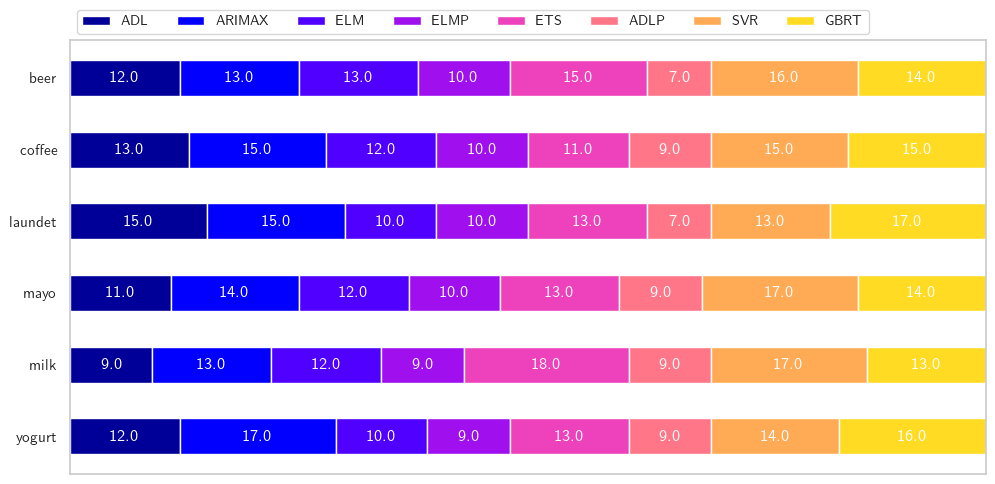

In [21]:
models_ = ['ADL', 'ARIMAX', 'ELM', 'ELMP',
 'ETS', 'ADLP', 'SVR', 'GBRT']
survey(results_list, models_)
plt.tight_layout()
# plt.savefig('results_final/models_for_EachCategory.pdf')